GRADUATE ROTATIONAL INTERNSHIP PROGRAM-THE SPARKS FOUNDATION

TASK-6

OBJECTIVE:PREDICTION USING DECISION TREE ALGORITHM

AUTHOR: NOMULA SRIHARI

IMPORTING REQUIRED LIBRARIES

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

DATASET LOADING

In [107]:
df=pd.read_csv('Iris.csv')

In [108]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
df.shape

(150, 6)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [111]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [112]:
df.drop(['Id'],axis=1,inplace=True)

In [113]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


DATA VISUALIZATION

Text(0.5, 1.0, 'Species vs sepal length')

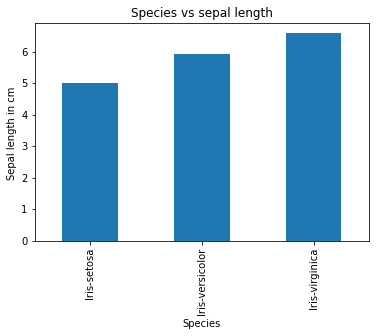

In [114]:
df.groupby('Species')['SepalLengthCm'].mean().plot.bar()
plt.ylabel('Sepal length in cm ')
plt.xlabel('Species')
plt.title('Species vs sepal length')

Text(0.5, 1.0, 'Species vs sepal width')

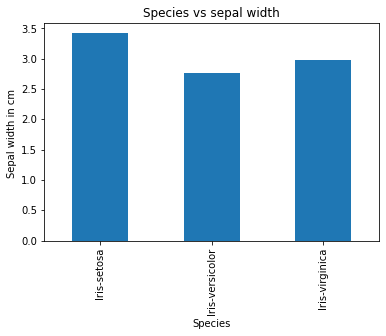

In [115]:
df.groupby('Species')['SepalWidthCm'].mean().plot.bar()
plt.ylabel('Sepal width in cm ')
plt.xlabel('Species')
plt.title('Species vs sepal width')

Text(0.5, 1.0, 'Species vs petal length')

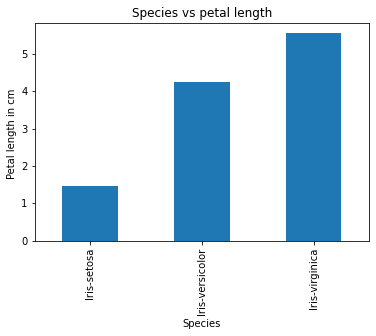

In [116]:
df.groupby('Species')['PetalLengthCm'].mean().plot.bar()
plt.ylabel('Petal length in cm ')
plt.xlabel('Species')
plt.title('Species vs petal length')

Text(0.5, 1.0, 'Species vs petal Width')

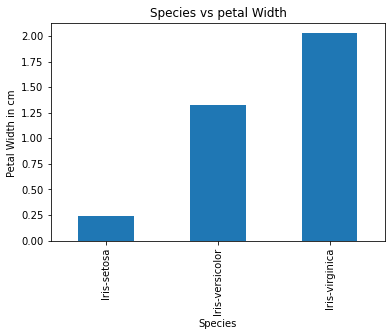

In [117]:
df.groupby('Species')['PetalWidthCm'].mean().plot.bar()
plt.ylabel('Petal Width in cm ')
plt.xlabel('Species')
plt.title('Species vs petal Width')

Text(0.5, 1.0, 'PetalLengthCm vs PetalWidthCm')

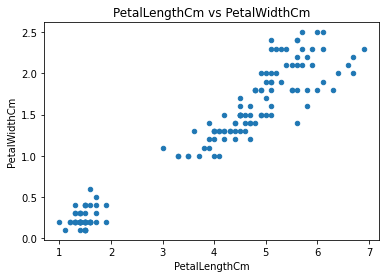

In [118]:
df.plot.scatter('PetalLengthCm','PetalWidthCm')
plt.title('PetalLengthCm vs PetalWidthCm')

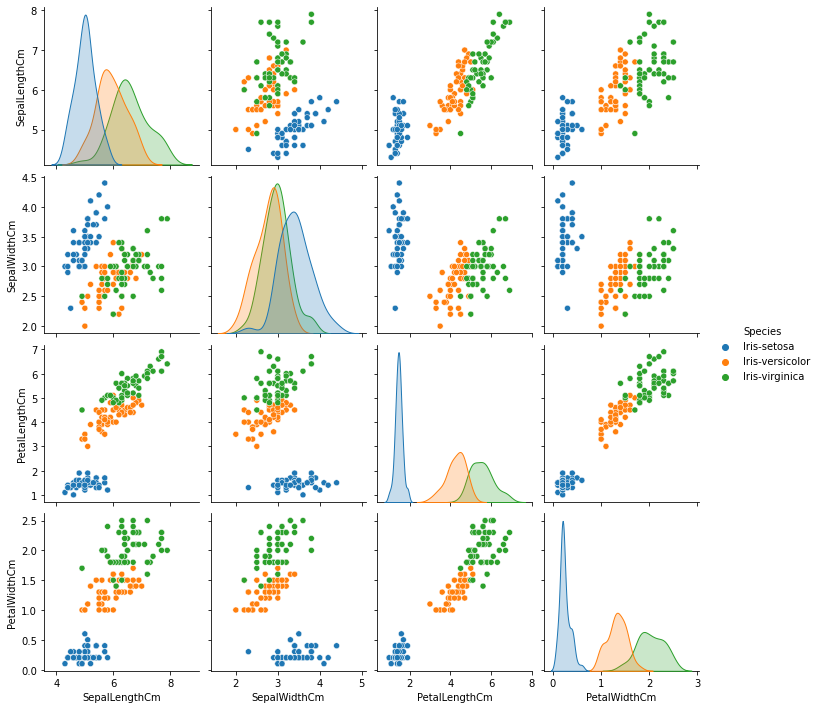

In [119]:
sns.pairplot(df,hue='Species',palette='tab10')

In [120]:
x=df.drop(['Species'],axis=1)
y=df['Species']

SPLITTING DATASET INTO TRAIN AND TEST IN THE 4:1 RATIO

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=101,stratify=y,test_size=0.2)

In [123]:
train_y.value_counts(normalize=True)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [124]:
test_y.value_counts(normalize=True)

Iris-virginica     0.333333
Iris-setosa        0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [125]:
train_x.shape,train_y.shape

((120, 4), (120,))

In [126]:
test_x.shape,test_y.shape

((30, 4), (30,))

BUILDING DECISION TREE CLASSIFIER MODEL

In [127]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [128]:
dt=dtc(random_state=10)

In [129]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(random_state=10)

In [130]:
acc=dt.score(test_x,test_y)
print('accuracy score is',acc)

accuracy score is 0.9666666666666667


In [131]:
dt.predict_proba(test_x)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

OPTIMISING MAX DEPTH

In [132]:
train_acc=[]
test_acc=[]
data_acc=[]
for depth in range(1,10):
    dt=dtc(max_depth=depth,random_state=55)
    dt.fit(train_x,train_y)
    train_acc.append(dt.score(train_x,train_y))
    test_acc.append(dt.score(test_x,test_y))
    data_acc.append(dt.score(x,y))

In [133]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_accuracy':train_acc,'test_accuracy':test_acc,'data_accuracy':data_acc})
frame.head(10)

,max_depth,train_accuracy,test_accuracy,data_accuracy
0,1,0.666667,0.666667,0.666667
1,2,0.958333,0.966667,0.960000
2,3,0.975000,0.966667,0.973333
3,4,1.000000,0.966667,0.993333
4,5,1.000000,0.966667,0.993333
5,6,1.000000,0.966667,0.993333
6,7,1.000000,0.966667,0.993333
7,8,1.000000,0.966667,0.993333
8,9,1.000000,0.966667,0.993333


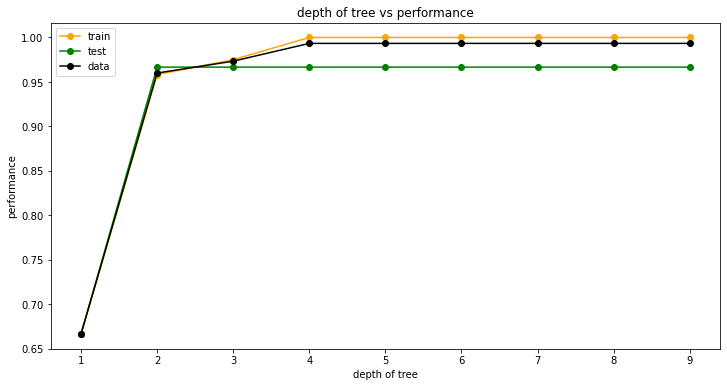

In [137]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_accuracy'],marker='o',color='orange',label='train')
plt.plot(frame['max_depth'],frame['test_accuracy'],marker='o',color='green',label='test')
plt.plot(frame['max_depth'],frame['data_accuracy'],marker='o',color='black',label='data')
plt.xlabel('depth of tree')
plt.ylabel('performance')
plt.title('depth of tree vs performance')
plt.legend()

CREATING ANOTHER DECISION TREE WITH OPTIMISED MAX DEPTH

In [135]:
dt=dtc(max_depth=5,max_leaf_nodes=15,random_state=10)

In [136]:
dt.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=10)

In [138]:
dt.score(test_x,test_y)

0.9666666666666667

In [139]:
dt1=dtc()

In [140]:
dt1.fit(x,y)

DecisionTreeClassifier()

VISUALISING THE DECISION TREE

In [141]:
from sklearn import tree

In [143]:
decision_tree=tree.export_graphviz(dt1,out_file='tree.dot',feature_names=x.columns,max_depth=5,filled=True)

In [144]:
!dot -Tpng tree.dot -o tree.png

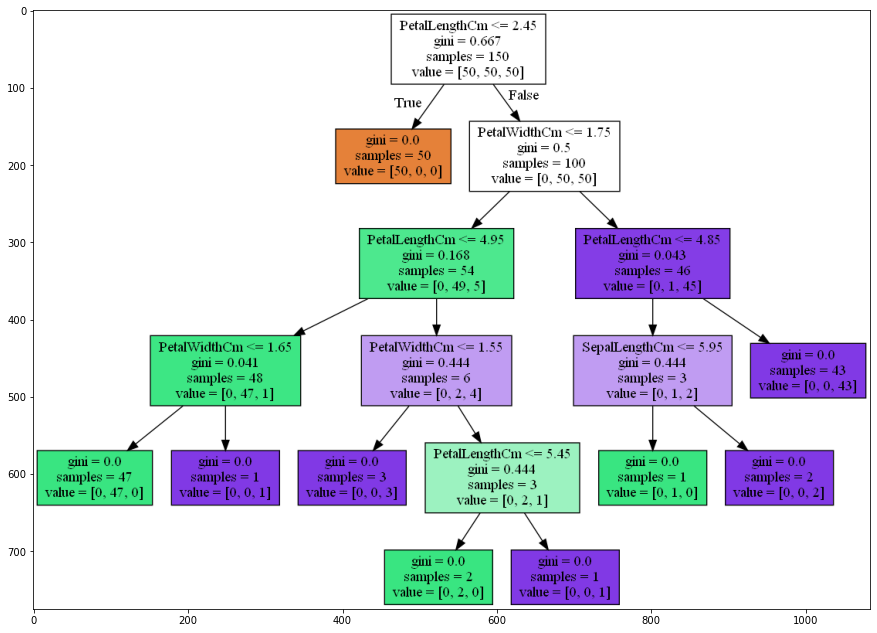

In [145]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

CHECKING THE MODEL PREDECTION BY GIVING INPUT DATA

In [147]:
dt.predict([[4.9,3.0,1.4,0.2]])

array(['Iris-setosa'], dtype=object)